# Dependencies

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from copy import deepcopy
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler   #Method #1 for Scaling
from sklearn.preprocessing import scale            #Method #2 for Scaling

sns.set_theme()

# Data Understanding

* Loyalty rated from -2.5 to 2.5 (Scaled)
* Satisfaction rated from 1 to 10 (Not Scaled)

* Scaling the Satisfaction to match Loyalty scaling is important because the algorithm 
might give it a higher weight (as it has way higher values) although they should have the same importance (weight)

# Data Preprocessing

In [2]:
# Creating a deep copy of the data
df_main = pd.read_csv('loyalty_satisfaction.csv')
df = deepcopy(df_main)

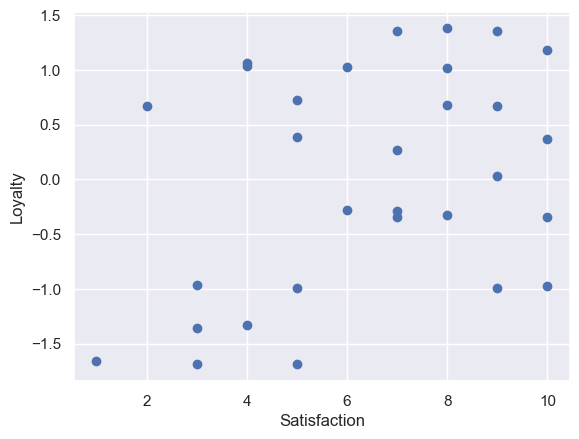

In [3]:
# Visualizing the data
plt.clf()
plt.scatter(x=df['Satisfaction'], y=df['Loyalty'])
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')
plt.show()

In [4]:
# Scaling the dataframe
df_scaled = scale(df)
# [Satisfaction , Loyalty]
df_scaled[:5]

array([[-0.93138063, -1.3318111 ],
       [-0.15523011, -0.28117124],
       [-0.54330537, -0.99160391],
       [ 0.23284516, -0.29117733],
       [-0.93138063,  1.05964534]])

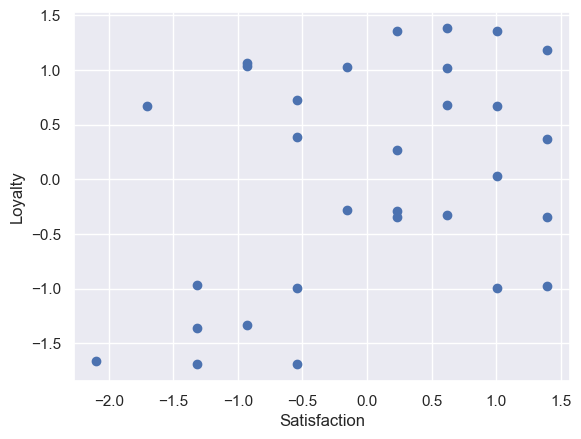

In [5]:
# Visualizing the scaled dataframe
plt.clf()
plt.scatter(x=df_scaled[:,0], y=df_scaled[:,1])
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')
plt.show()

In [6]:
# Within-cluster sum of squares / Distance between clusters
wcss = []
number_clusters = range(1, 10)

# Get the WCSS for each model trained using 1 to 9 clusters
for number in number_clusters:
    kmeans = KMeans(number)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

print (wcss)

[60.0, 29.818973034723147, 18.32589143135198, 10.247181805928422, 7.792695153937186, 6.666688373390819, 7.5043378406115195, 5.5279978754512555, 4.626467063167679]


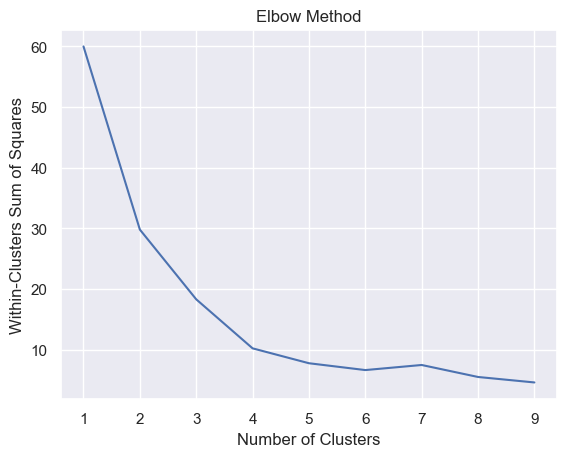

In [7]:
# Elbow method visualize the significance of X-number of Clusters
sns.lineplot(x=number_clusters, y=wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Clusters Sum of Squares')
plt.show()

# Modeling and Visualization

In [8]:
# Train different algorithms based on a certain number of clusters
number_clusters_optimal = range(2,6)

for number in number_clusters_optimal:
    kmeans = KMeans(number)
    kmeans.fit(df_scaled)
    # Predict on the scaled dataframe (variables of similar weight)
    prediction = kmeans.fit_predict(df_scaled)
    # New column for the main df based on the iteration, adding the prediction as value
    df["clusters_" + str(number)] = prediction

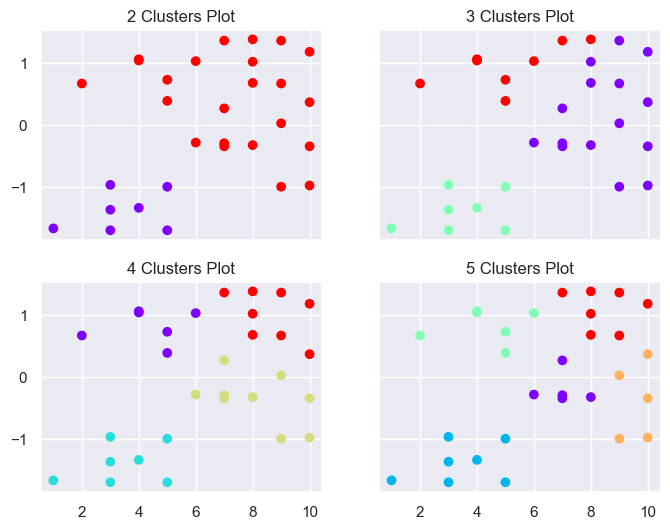

In [ ]:
# Visualizing the predictions of all the different number of clusters 
fig, ax = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(8,6))

x = df['Satisfaction']
y = df['Loyalty']

# Subplot 0,0: 2 Clusters
ax[0][0].title.set_text('2 Clusters Plot')
ax[0][0].scatter(x, y, c=df['clusters_2'], cmap='rainbow')

# Subplot 0,1: 3 Clusters
ax[0][1].title.set_text('3 Clusters Plot')
ax[0][1].scatter(x, y, c=df['clusters_3'], cmap='rainbow')

# Subplot 1,0: 4 Clusters
ax[1][0].title.set_text('4 Clusters Plot')
ax[1][0].scatter(x, y, c=df['clusters_4'], cmap='rainbow')

# Subplot 1,1: 5 Clusters
ax[1][1].title.set_text('5 Clusters Plot')
ax[1][1].scatter(x, y, c=df['clusters_5'], cmap='rainbow')

plt.show()